In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.transforms import Bbox
import seaborn as sns
import scanpy as sc
import scipy
import sklearn

from importlib import reload

import plotting as plt2

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/geneformer_adata/processed.anndata.lt.h5ad"

adata = sc.read_h5ad(fpath)
adata

AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue'
    var: 'gene_name', 'ensemble_id', 'n_counts'
    uns: 'go_annotations', 'log1p', 'panglaodb'
    layers: 'log_norm', 'raw_counts'

In [3]:
sc.logging.print_memory_usage()

Memory usage: current 8.66 GB, difference +8.66 GB


In [4]:
adata.obs['dataset'].value_counts()

dataset
tabula_sapiens    26586
pellin            12228
iHSC               8574
young2_HSC         3703
old2_BMMC_HSPC     2365
old1_BMMC_HSPC      891
Name: count, dtype: int64

In [5]:
adata.obs['cell_type'].value_counts()

cell_type
FB                        26586
iHSC                       8574
LinNegCD34PosCD164Pos      6343
HSC                        5798
LinNegCD34lowCD164high     4265
MPP                        1795
MKP                         863
MLP                         123
Name: count, dtype: int64

In [6]:
adata.obs['organ_tissue'].value_counts()

organ_tissue
nan                27761
Fat                 8459
Vasculature         5867
Bladder             5557
Thymus              3924
Trachea             1239
Large_Intestine      953
Tongue               251
Prostate             223
Small_Intestine      113
Name: count, dtype: int64

# Reprocessing

In [7]:
# sc.pp.highly_variable_genes(adata, n_top_genes=5000)
# sc.tl.pca(adata, n_comps=10)
# sc.pp.neighbors(adata, n_neighbors=51)
# sc.tl.umap(adata, min_dist=0.25)

sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.75)

print('done')

done


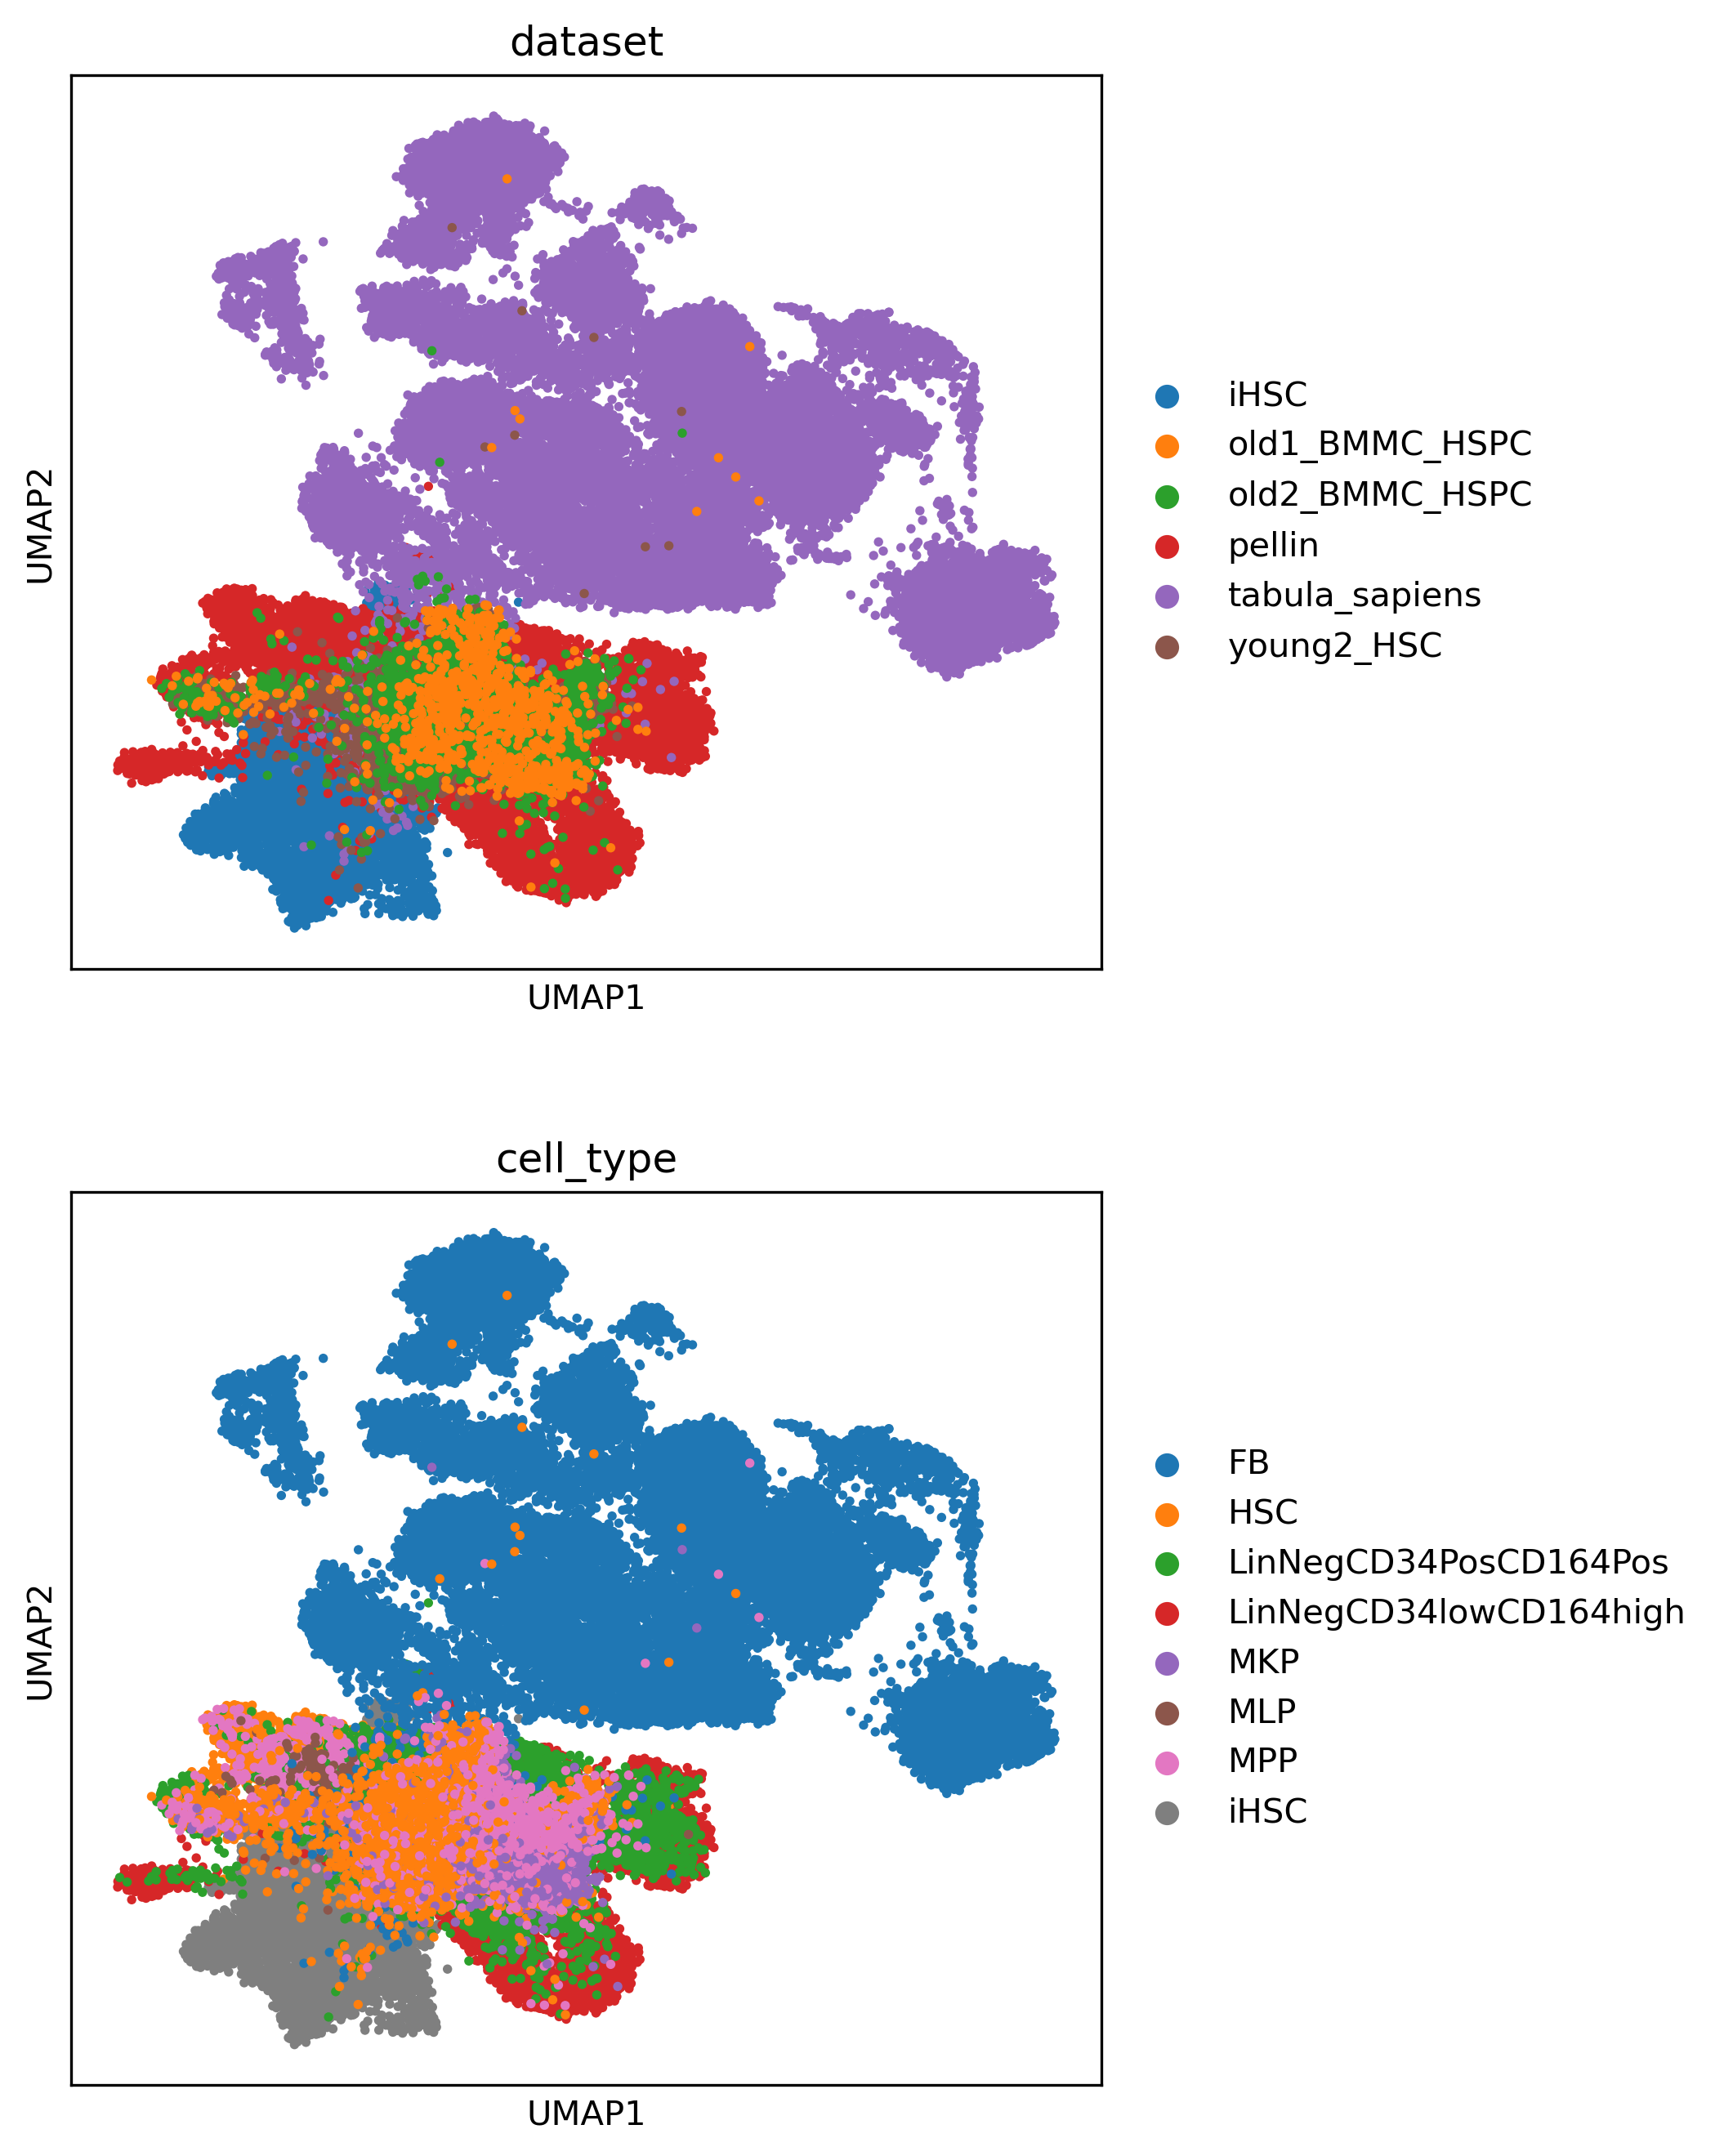

In [8]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sc.pl.umap(adata, 
           color=['dataset','cell_type'],
           ncols=1,
           s=30,)

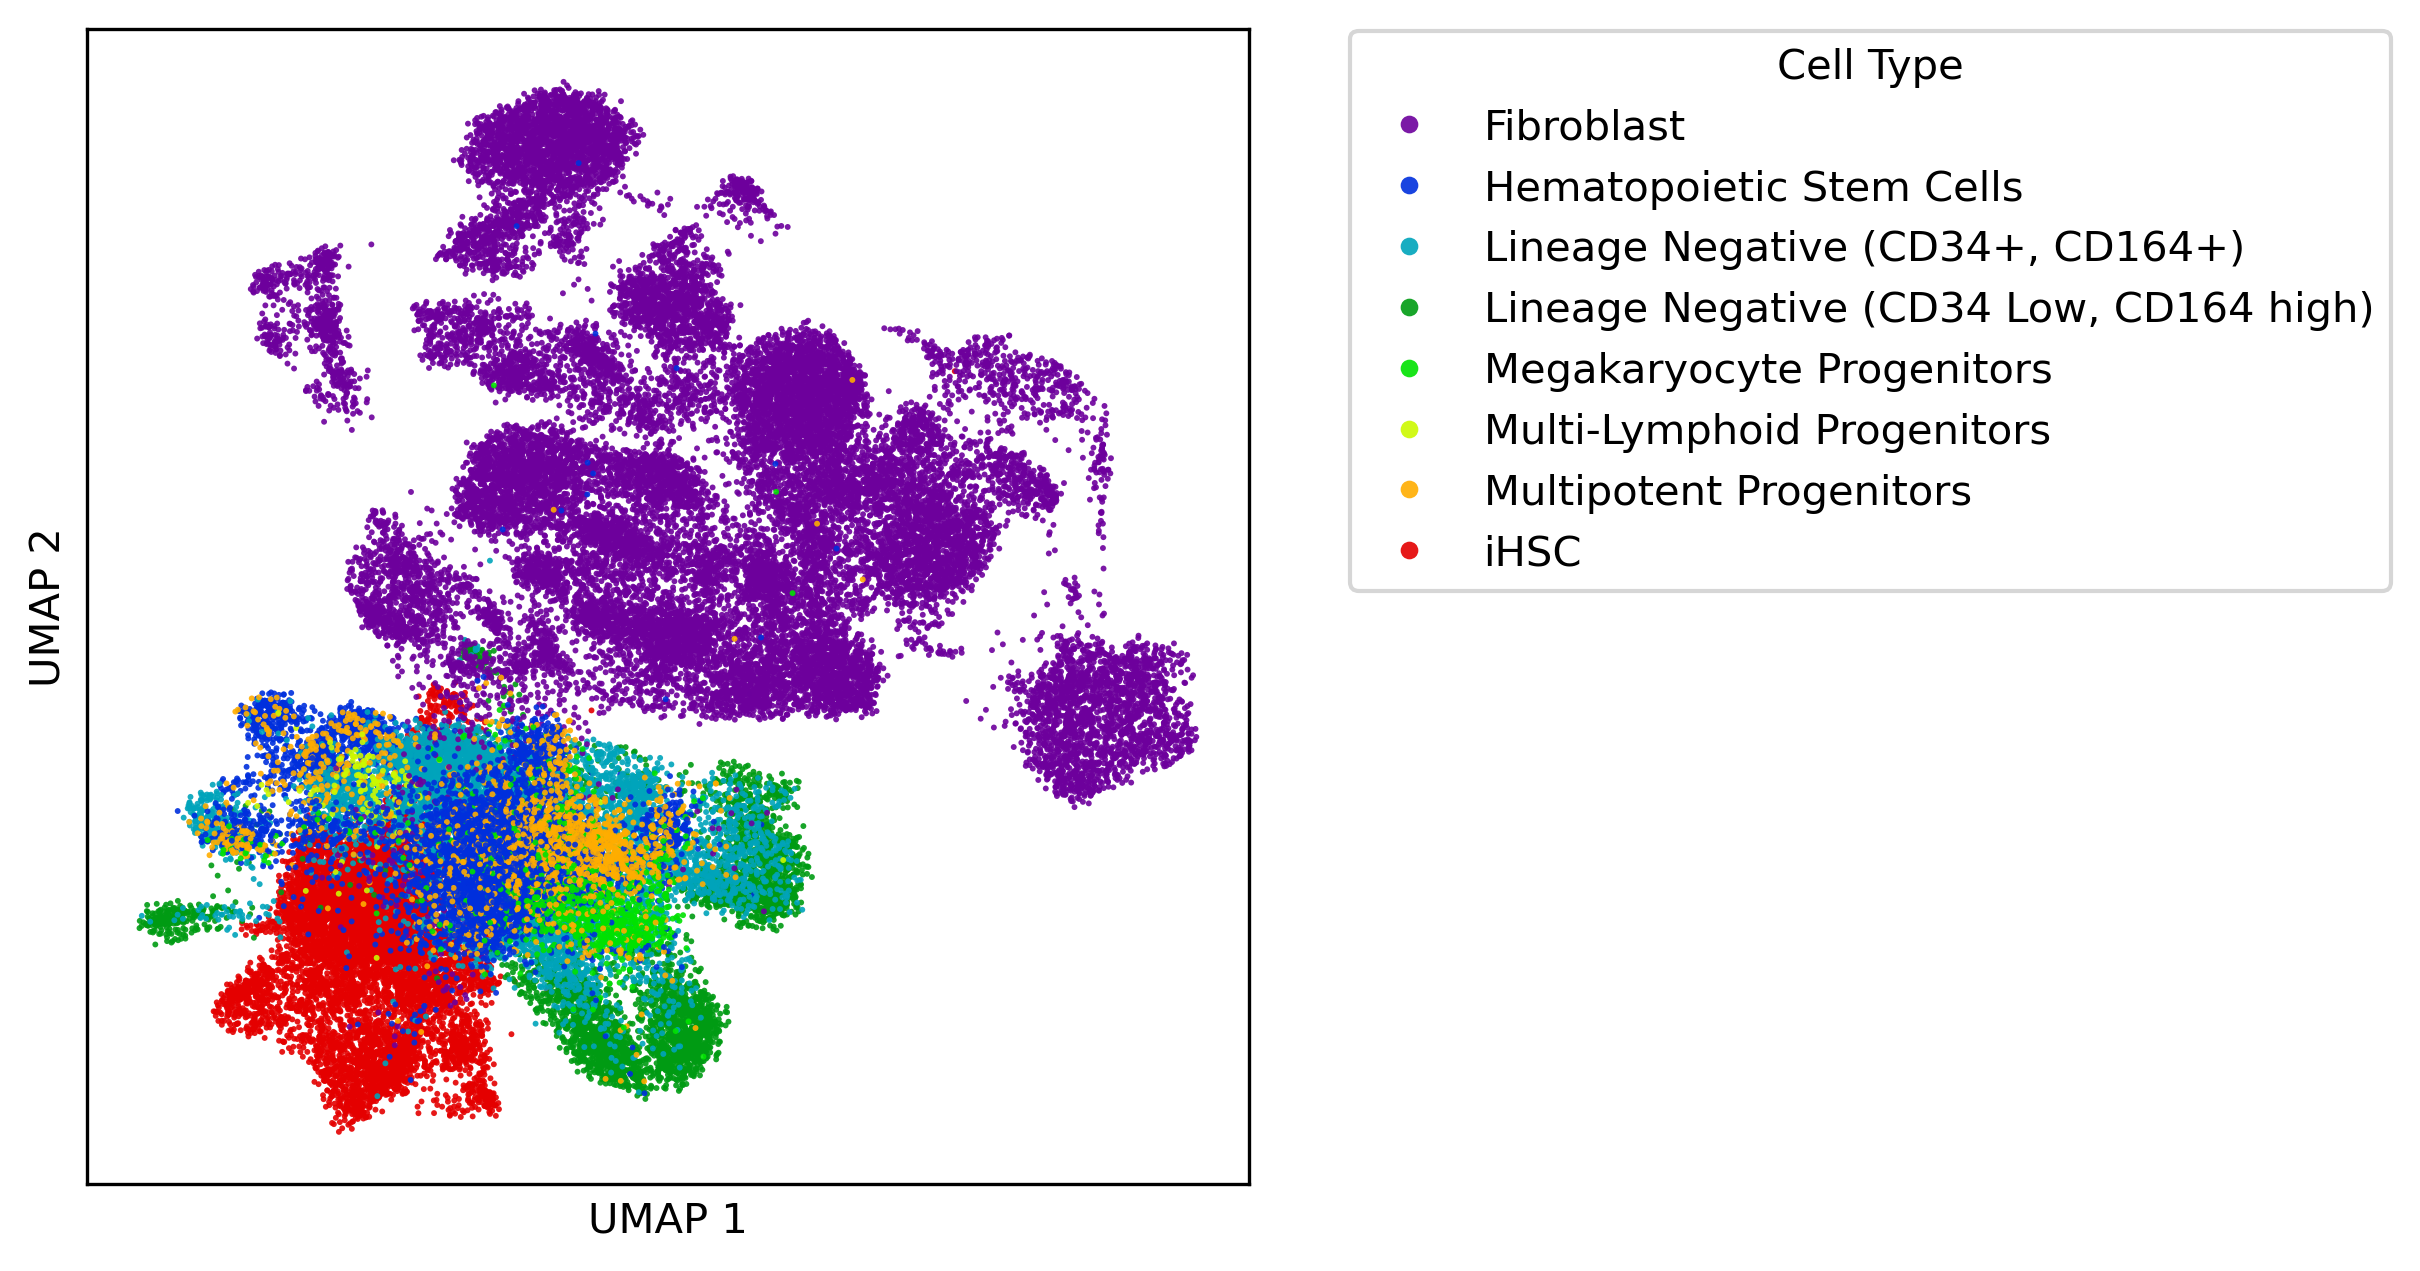

In [9]:
hematopoietic_mapping = {
    "FB": "Fibroblast",
    "iHSC": "iHSC",
    "LinNegCD34PosCD164Pos": "Lineage Negative (CD34+, CD164+)",
    "HSC": "Hematopoietic Stem Cells",
    "LinNegCD34lowCD164high": "Lineage Negative (CD34 Low, CD164 high)",
    "MPP": "Multipotent Progenitors",
    "MKP": "Megakaryocyte Progenitors",
    "MLP": "Multi-Lymphoid Progenitors"
}

adata.obs['biotype'] = adata.obs['cell_type'].map(hematopoietic_mapping)
adata.obs['biotype'].value_counts()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sns.scatterplot(data=adata.obs,
                x=adata.obsm['X_umap'][:, 0],
                y=adata.obsm['X_umap'][:, 1],
                ec='none',
                lw=0.1,
                alpha=0.9,
                hue='biotype',
                palette="nipy_spectral",
                s=2)

plt.xticks([])
plt.yticks([])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

sns.move_legend(plt.gca(), 
                title="Cell Type",
                loc='upper right',
                markerscale=3,
                bbox_to_anchor=(2.0, 1.017))

plt.gca().set_aspect('auto')


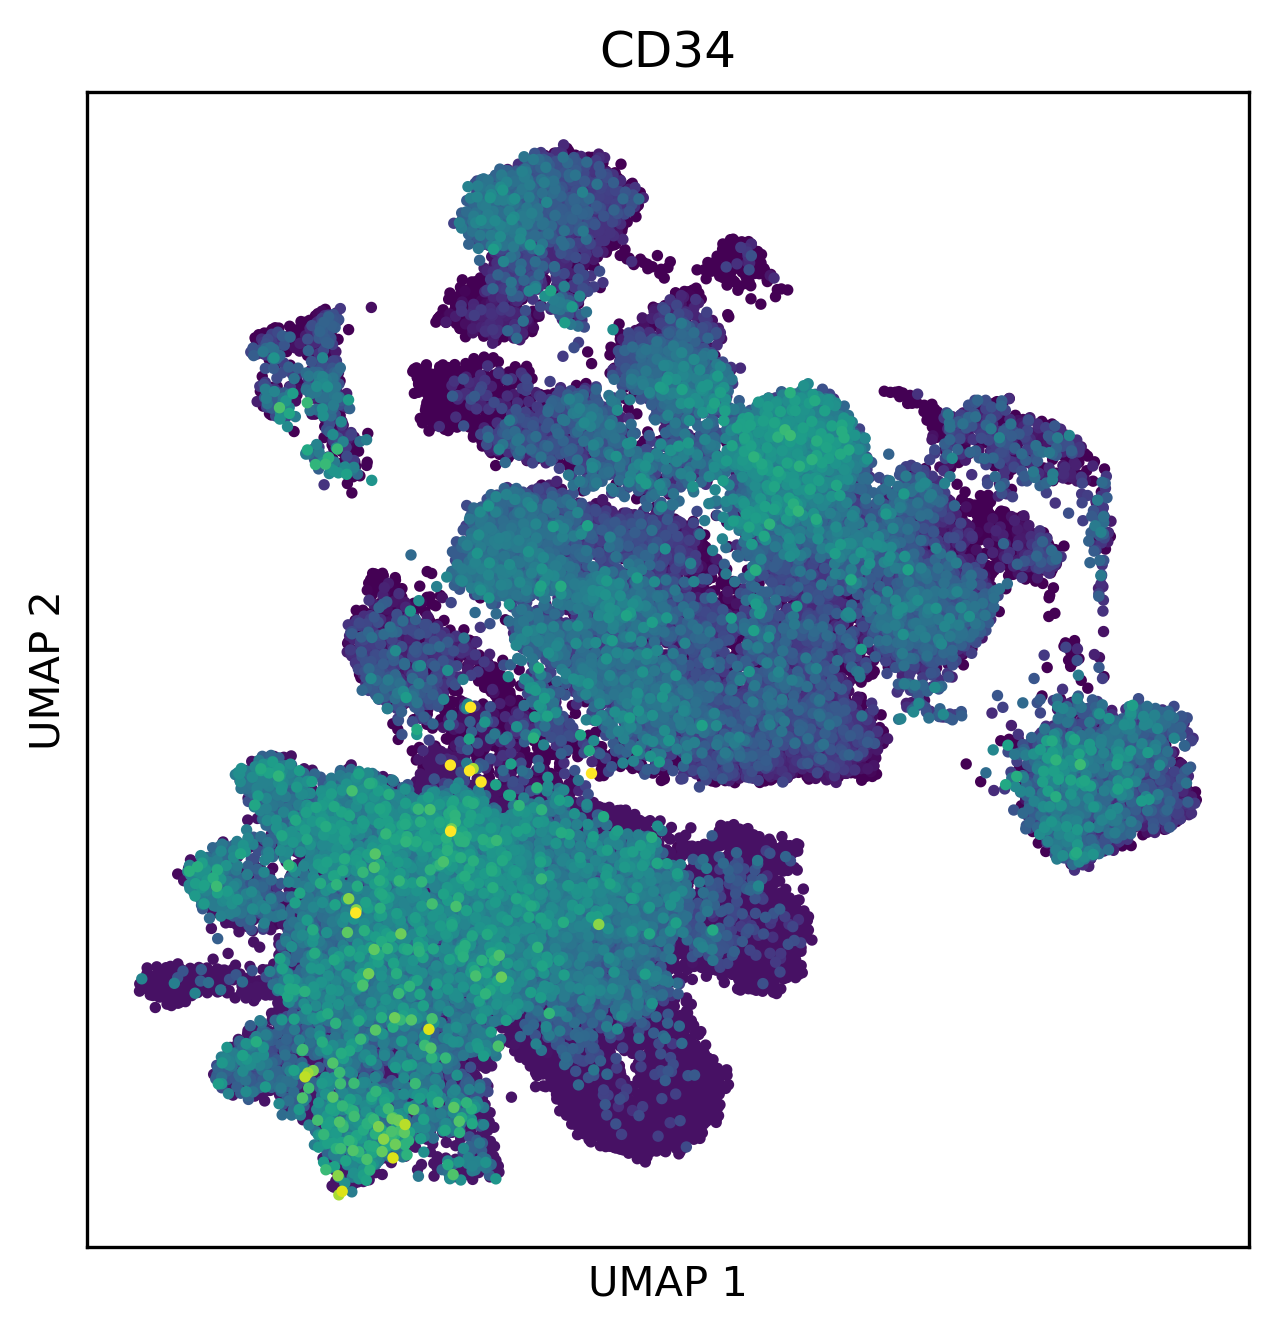

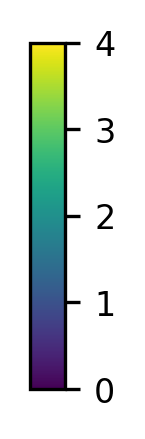

In [10]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, 
                       color='CD34',
                       vmin=0, 
                       vmax=4,
                       title='CD34', 
                       s=3,
                      )

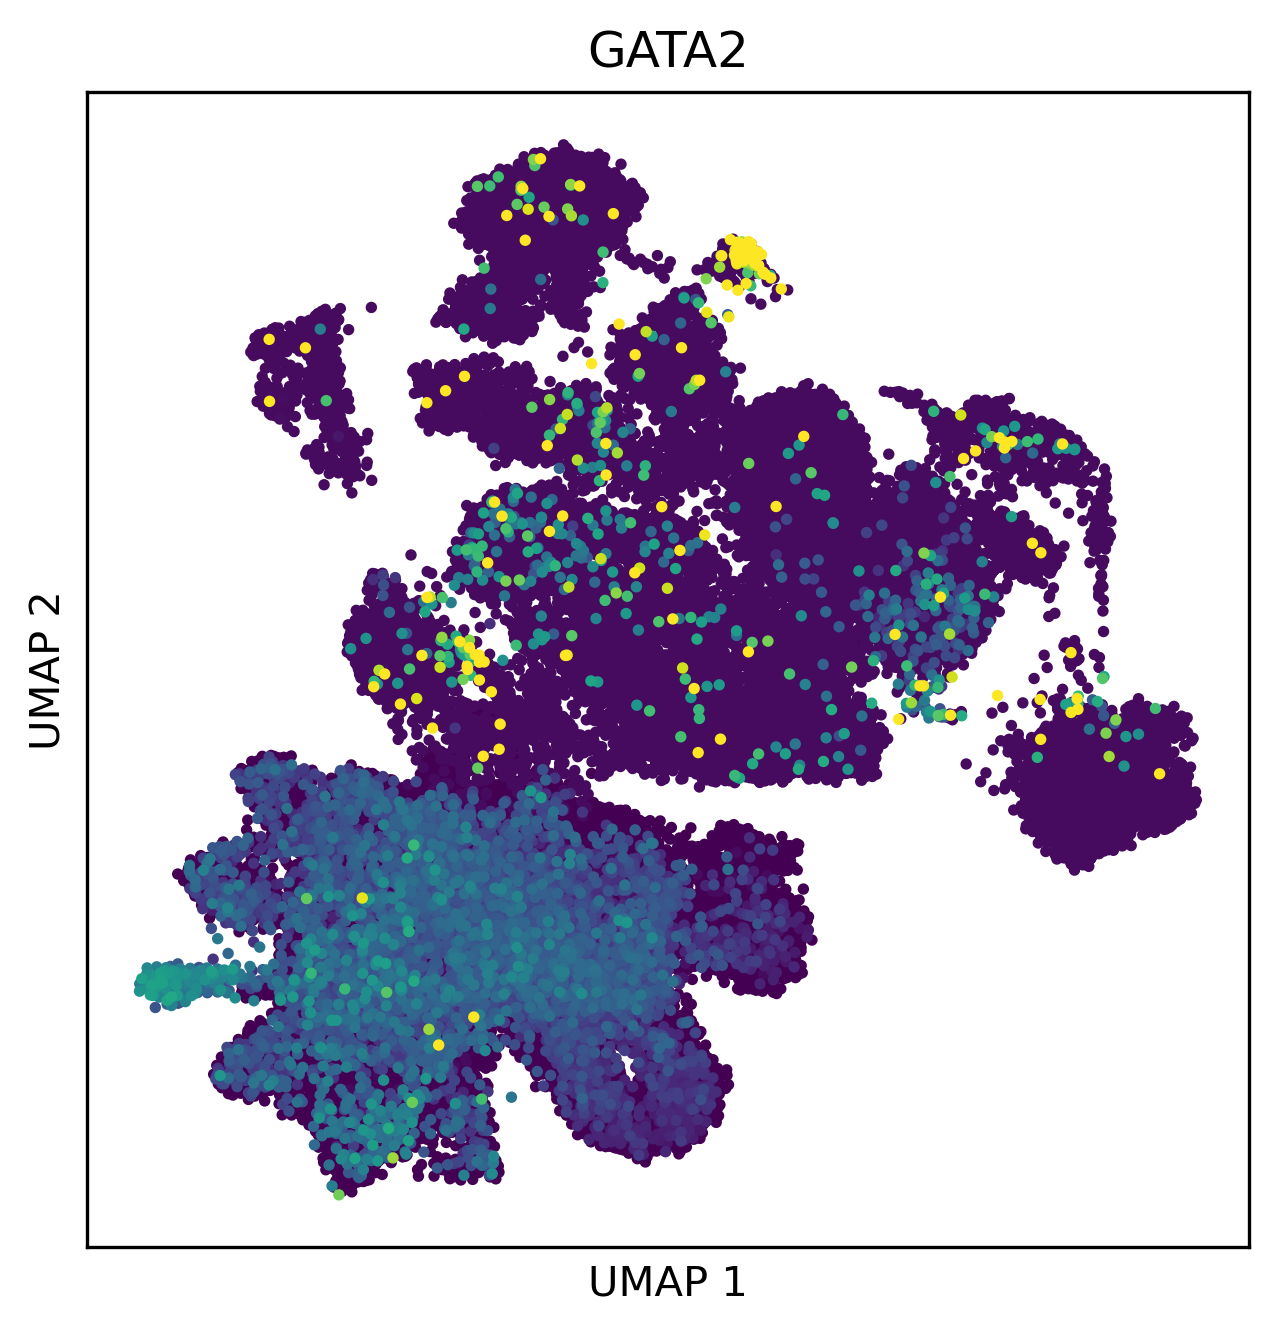

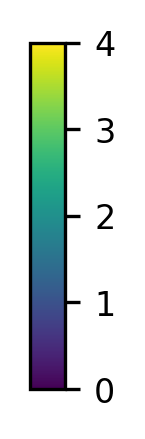

In [11]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, 
                       color='GATA2', 
                       title='GATA2',
                       vmin=0, 
                       vmax=4,
                       s=3)

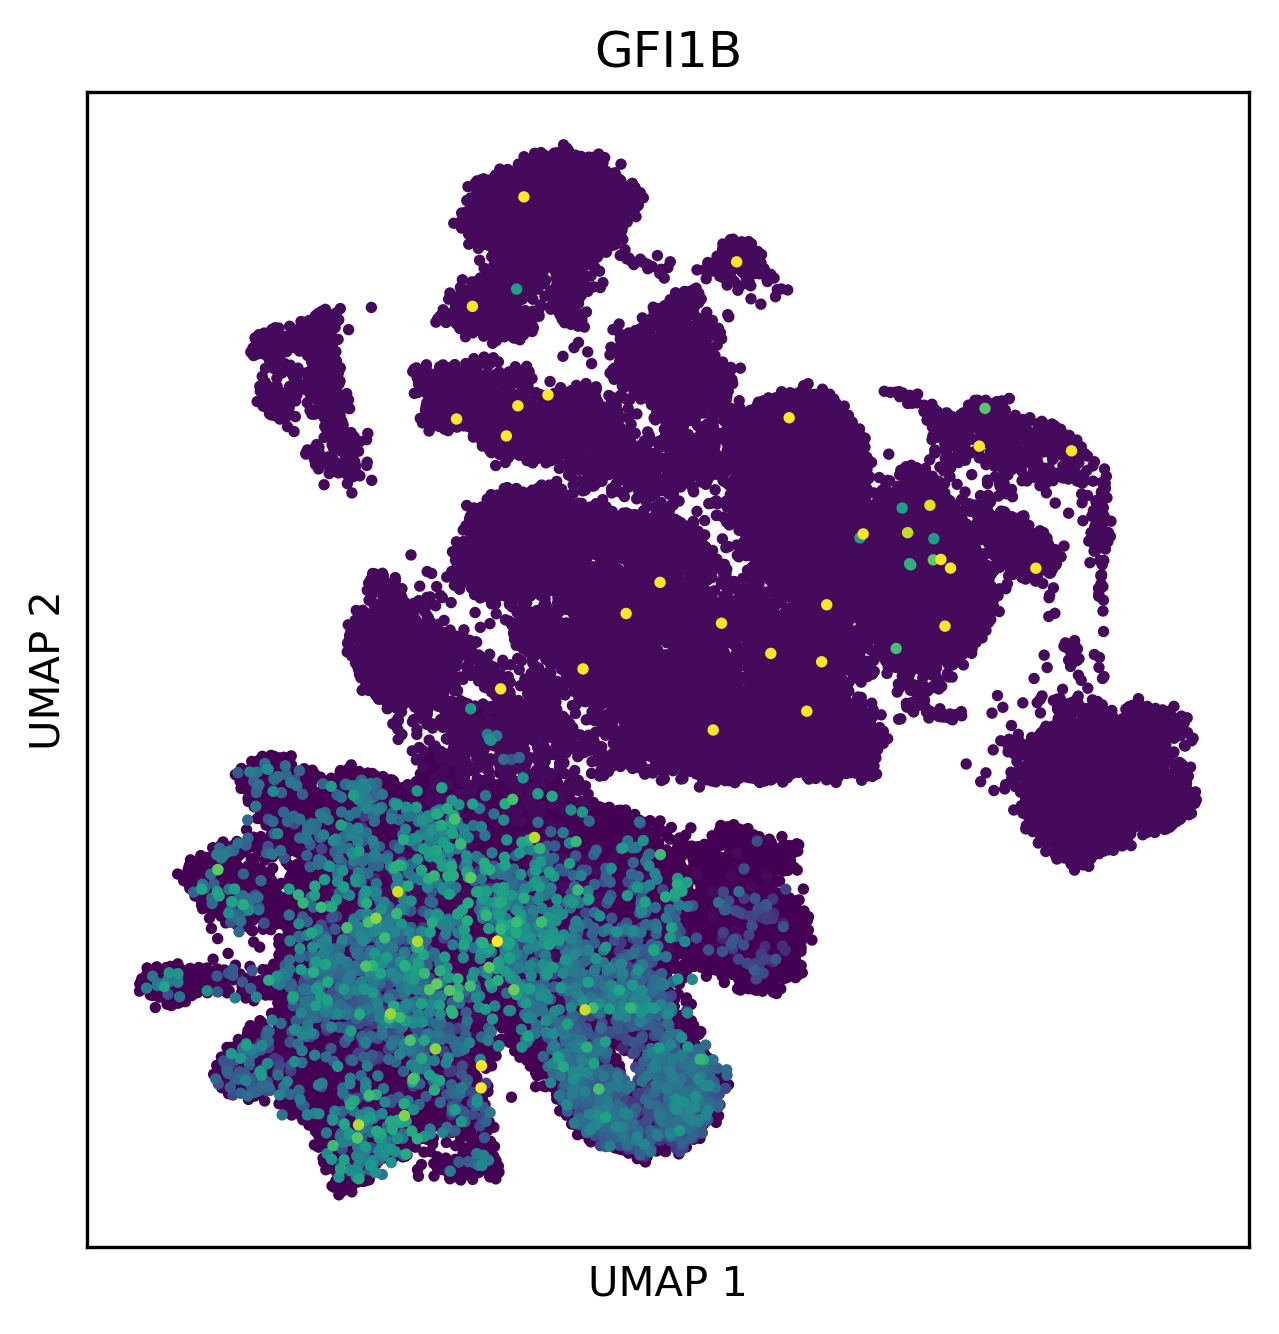

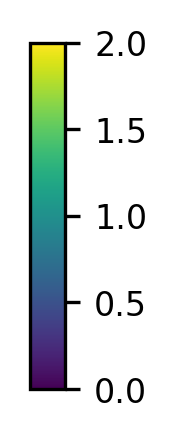

In [12]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, 
                       color='GFI1B', 
                       title='GFI1B',
                       vmin=0,
                       vmax=2, 
                       s=3)

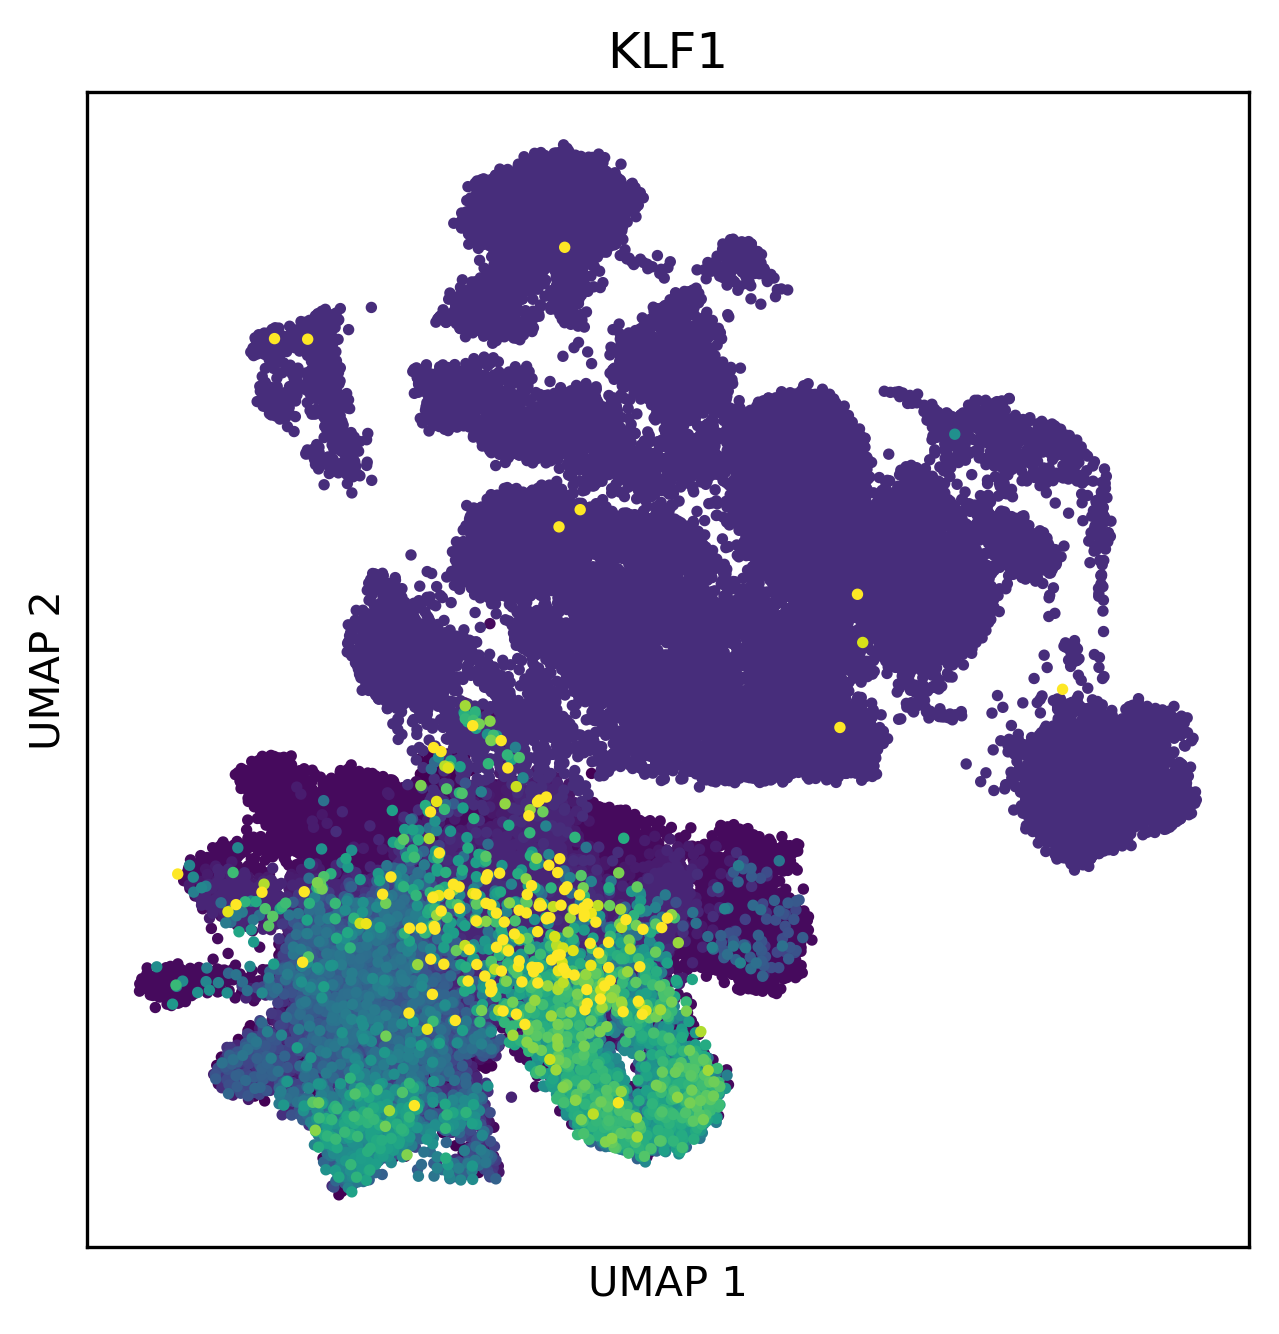

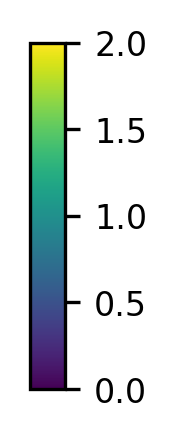

In [13]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, 
                       color='KLF1', 
                       title='KLF1',
                       vmin=0,
                       vmax=2, 
                       s=3)

# Distances

In [16]:
metric = 'euclidean'
n_comps = 15
X = adata.obsm['X_pca'][:, 0:n_comps]

def min_max(v):
    return (v - v.min()) / (v.max() - v.min())

D = scipy.spatial.distance.pdist(X, metric=metric) 
D = scipy.spatial.distance.squareform(D)
D = pd.DataFrame(D, index=adata.obs.index, columns=adata.obs.index)
print(f"{D.shape=}")
D.head()

D.shape=(54347, 54347)


AAACCCAAGGTTACCT_iHSC  AAACCCAAGTTGAAGT_iHSC  \
AAACCCAAGGTTACCT_iHSC               0.000000               2.466340   
AAACCCAAGTTGAAGT_iHSC               2.466340               0.000000   
AAACCCAAGTTGTCGT_iHSC               3.348393               4.074716   
AAACCCACAGAAGCGT_iHSC               3.413334               4.282256   
AAACCCACAGGAGGTT_iHSC               2.796058               2.308820   

                       AAACCCAAGTTGTCGT_iHSC  AAACCCACAGAAGCGT_iHSC  \
AAACCCAAGGTTACCT_iHSC               3.348393               3.413334   
AAACCCAAGTTGAAGT_iHSC               4.074716               4.282256   
AAACCCAAGTTGTCGT_iHSC               0.000000               3.284008   
AAACCCACAGAAGCGT_iHSC               3.284008               0.000000   
AAACCCACAGGAGGTT_iHSC               3.687472               4.400558   

                       AAACCCACAGGAGGTT_iHSC  AAACCCAGTACCTAAC_iHSC  \
AAACCCAAGGTTACCT_iHSC               2.796058               2.307851   
AAACCCAAGTTGAAGT_iHSC               2.308820               3.293487   
AAACCCAAGTTGTCGT_iHSC               3.687472               3.881701   
AAACCCACAGAAGCGT_iHSC               4.400558               3.554164   
AAACCCACAGGAGGTT_iHSC               0.000000               3.383610   

                       AAACCCATCAGGACGA_iHSC  AAACCCATCTTACGGA_iHSC  \
AAACCCAAGGTTACCT_iHSC               1.935252               2.269587   
AAACCCAAGTTGAAGT_iHSC               2.384488               3.413636   
AAACCCAAGTTGTCGT_iHSC               3.683306               3.625103   
AAACCCACAGAAGCGT_iHSC               4.066556               4.293935   
AAACCCACAGGAGGTT_iHSC               3.005373               2.764906   

                       AAACGAAAGATACAGT_iHSC  AAACGAACAGCGAACA_iHSC  ...  \
AAACCCAAGGTTACCT_iHSC               2.748191               5.274514  ...   
AAACCCAAGTTGAAGT_iHSC               3.717433               5.416865  ...   
AAACCCAAGTTGTCGT_iHSC               3.078493               3.279439  ...   
AAACCCACAGAAGCGT_iHSC               2.039101               4.238003  ...   
AAACCCACAGGAGGTT_iHSC               3.716481               4.669608  ...   

                       TTTCACCCATCCGTAA-2_old1_BMMC_HSPC  \
AAACCCAAGGTTACCT_iHSC                           5.831960   
AAACCCAAGTTGAAGT_iHSC                           6.816179   
AAACCCAAGTTGTCGT_iHSC                           7.237967   
AAACCCACAGAAGCGT_iHSC                           7.272489   
AAACCCACAGGAGGTT_iHSC                           6.560215   

                       TTTCAGTTCACCAATA-2_old1_BMMC_HSPC  \
AAACCCAAGGTTACCT_iHSC                           4.453239   
AAACCCAAGTTGAAGT_iHSC                           4.369685   
AAACCCAAGTTGTCGT_iHSC                           4.914830   
AAACCCACAGAAGCGT_iHSC                           4.809315   
AAACCCACAGGAGGTT_iHSC                           4.229450   

                       TTTCGTCCAATGCGCT-2_old1_BMMC_HSPC  \
AAACCCAAGGTTACCT_iHSC                           3.161573   
AAACCCAAGTTGAAGT_iHSC                           3.508505   
AAACCCAAGTTGTCGT_iHSC                           4.318967   
AAACCCACAGAAGCGT_iHSC                           3.706714   
AAACCCACAGGAGGTT_iHSC                           3.292287   

                       TTTCGTCCATTCCTCG-2_old1_BMMC_HSPC  \
AAACCCAAGGTTACCT_iHSC                           3.671175   
AAACCCAAGTTGAAGT_iHSC                           3.416760   
AAACCCAAGTTGTCGT_iHSC                           3.616727   
AAACCCACAGAAGCGT_iHSC                           3.044207   
AAACCCACAGGAGGTT_iHSC                           3.517118   

                       TTTCTCACAGGACACA-2_old1_BMMC_HSPC  \
AAACCCAAGGTTACCT_iHSC                           4.210137   
AAACCCAAGTTGAAGT_iHSC                           4.164970   
AAACCCAAGTTGTCGT_iHSC                           4.602743   
AAACCCACAGAAGCGT_iHSC                           4.690689   
AAACCCACAGGAGGTT_iHSC                           4.716449   

                       TTTGACTTCGCAATCG-2_old1_BMMC_H

In [18]:
def calculate_mean_group_distances(D, pdf, group_col='group'):
    """Calculates mean pairwise distances between groups in a distance matrix.

    Args:
        D (pd.DataFrame): Pairwise distance matrix with index and columns matching pdf.obs.index.
        pdf (anndata.AnnData): Annotated data object containing the grouping column.
        group_col (str, optional): The column name in `pdf.obs` specifying the groups (default is 'group').

    Returns:
        pd.DataFrame: A pivot table with mean pairwise distances between groups.
    """
    results = []
    
    for i_name, group_i in pdf.obs.groupby(group_col):
        for j_name, group_j in pdf.obs.groupby(group_col):
            i_idx = group_i.index
            j_idx = group_j.index
        
            mean_dist = np.mean(D.loc[i_idx][j_idx].to_numpy())
        
            row = {
                'i_name' : i_name,
                'j_name' : j_name,
                'mean_dist' : mean_dist,
            }
        
            results.append(row)
            
    results = pd.DataFrame(results)
    results = pd.pivot_table(results, 
                     index='i_name', 
                     columns='j_name', 
                     values='mean_dist')
    return results


means = calculate_mean_group_distances(D, adata, group_col='biotype')
means.head()

/tmp/ipykernel_1959160/2746053601.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i_name, group_i in pdf.obs.groupby(group_col):
/tmp/ipykernel_1959160/2746053601.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for j_name, group_j in pdf.obs.groupby(group_col):


j_name                                   Fibroblast  Hematopoietic Stem Cells  \
i_name                                                                          
Fibroblast                                 7.095162                  6.085789   
Hematopoietic Stem Cells                   6.085789                  4.265081   
Lineage Negative (CD34 Low, CD164 high)    6.589352                  5.608836   
Lineage Negative (CD34+, CD164+)           6.043995                  4.417404   
Megakaryocyte Progenitors                  5.987282                  4.719145   

j_name                                   Lineage Negative (CD34 Low, CD164 high)  \
i_name                                                                             
Fibroblast                                                              6.589352   
Hematopoietic Stem Cells                                                5.608836   
Lineage Negative (CD34 Low, CD164 high)                                 5.014831   
Lineage Negative (CD34+, CD164+)                                        5.445506   
Megakaryocyte Progenitors                                               4.934739   

j_name                                   Lineage Negative (CD34+, CD164+)  \
i_name                                                                      
Fibroblast                                                       6.043995   
Hematopoietic Stem Cells                                         4.417404   
Lineage Negative (CD34 Low, CD164 high)                          5.445506   
Lineage Negative (CD34+, CD164+)                                 4.238280   
Megakaryocyte Progenitors                                        4.643054   

j_name                                   Megakaryocyte Progenitors  \
i_name                                                               
Fibroblast                                                5.987282   
Hematopoietic Stem Cells                                  4.719145   
Lineage Negative (CD34 Low, CD164 high)                   4.934739   
Lineage Negative (CD34+, CD164+)                          4.643054   
Megakaryocyte Progenitors                                 4.134063   

j_name                                   Multi-Lymphoid Progenitors  \
i_name                                                                
Fibroblast                                                 6.354468   
Hematopoietic Stem Cells                                   4.303256   
Lineage Negative (CD34 Low, CD164 high)                    6.317289   
Lineage Negative (CD34+, CD164+)                           4.522691   
Megakaryocyte Progenitors                                  5.313400   

j_name                                   Multipotent Progenitors      iHSC  
i_name                                                                      
Fibroblast                                              6.025191  5.676905  
Hematopoietic Stem Cells                                4.455601  3.974689  
Lineage Negative (CD34 Low, CD164 high)                 5.353098  4.955276  
Lineage Negative (CD34+, CD164+)                        4.405475  3.940284  
Megakaryocyte Progenitors                               4.464647  4.139438

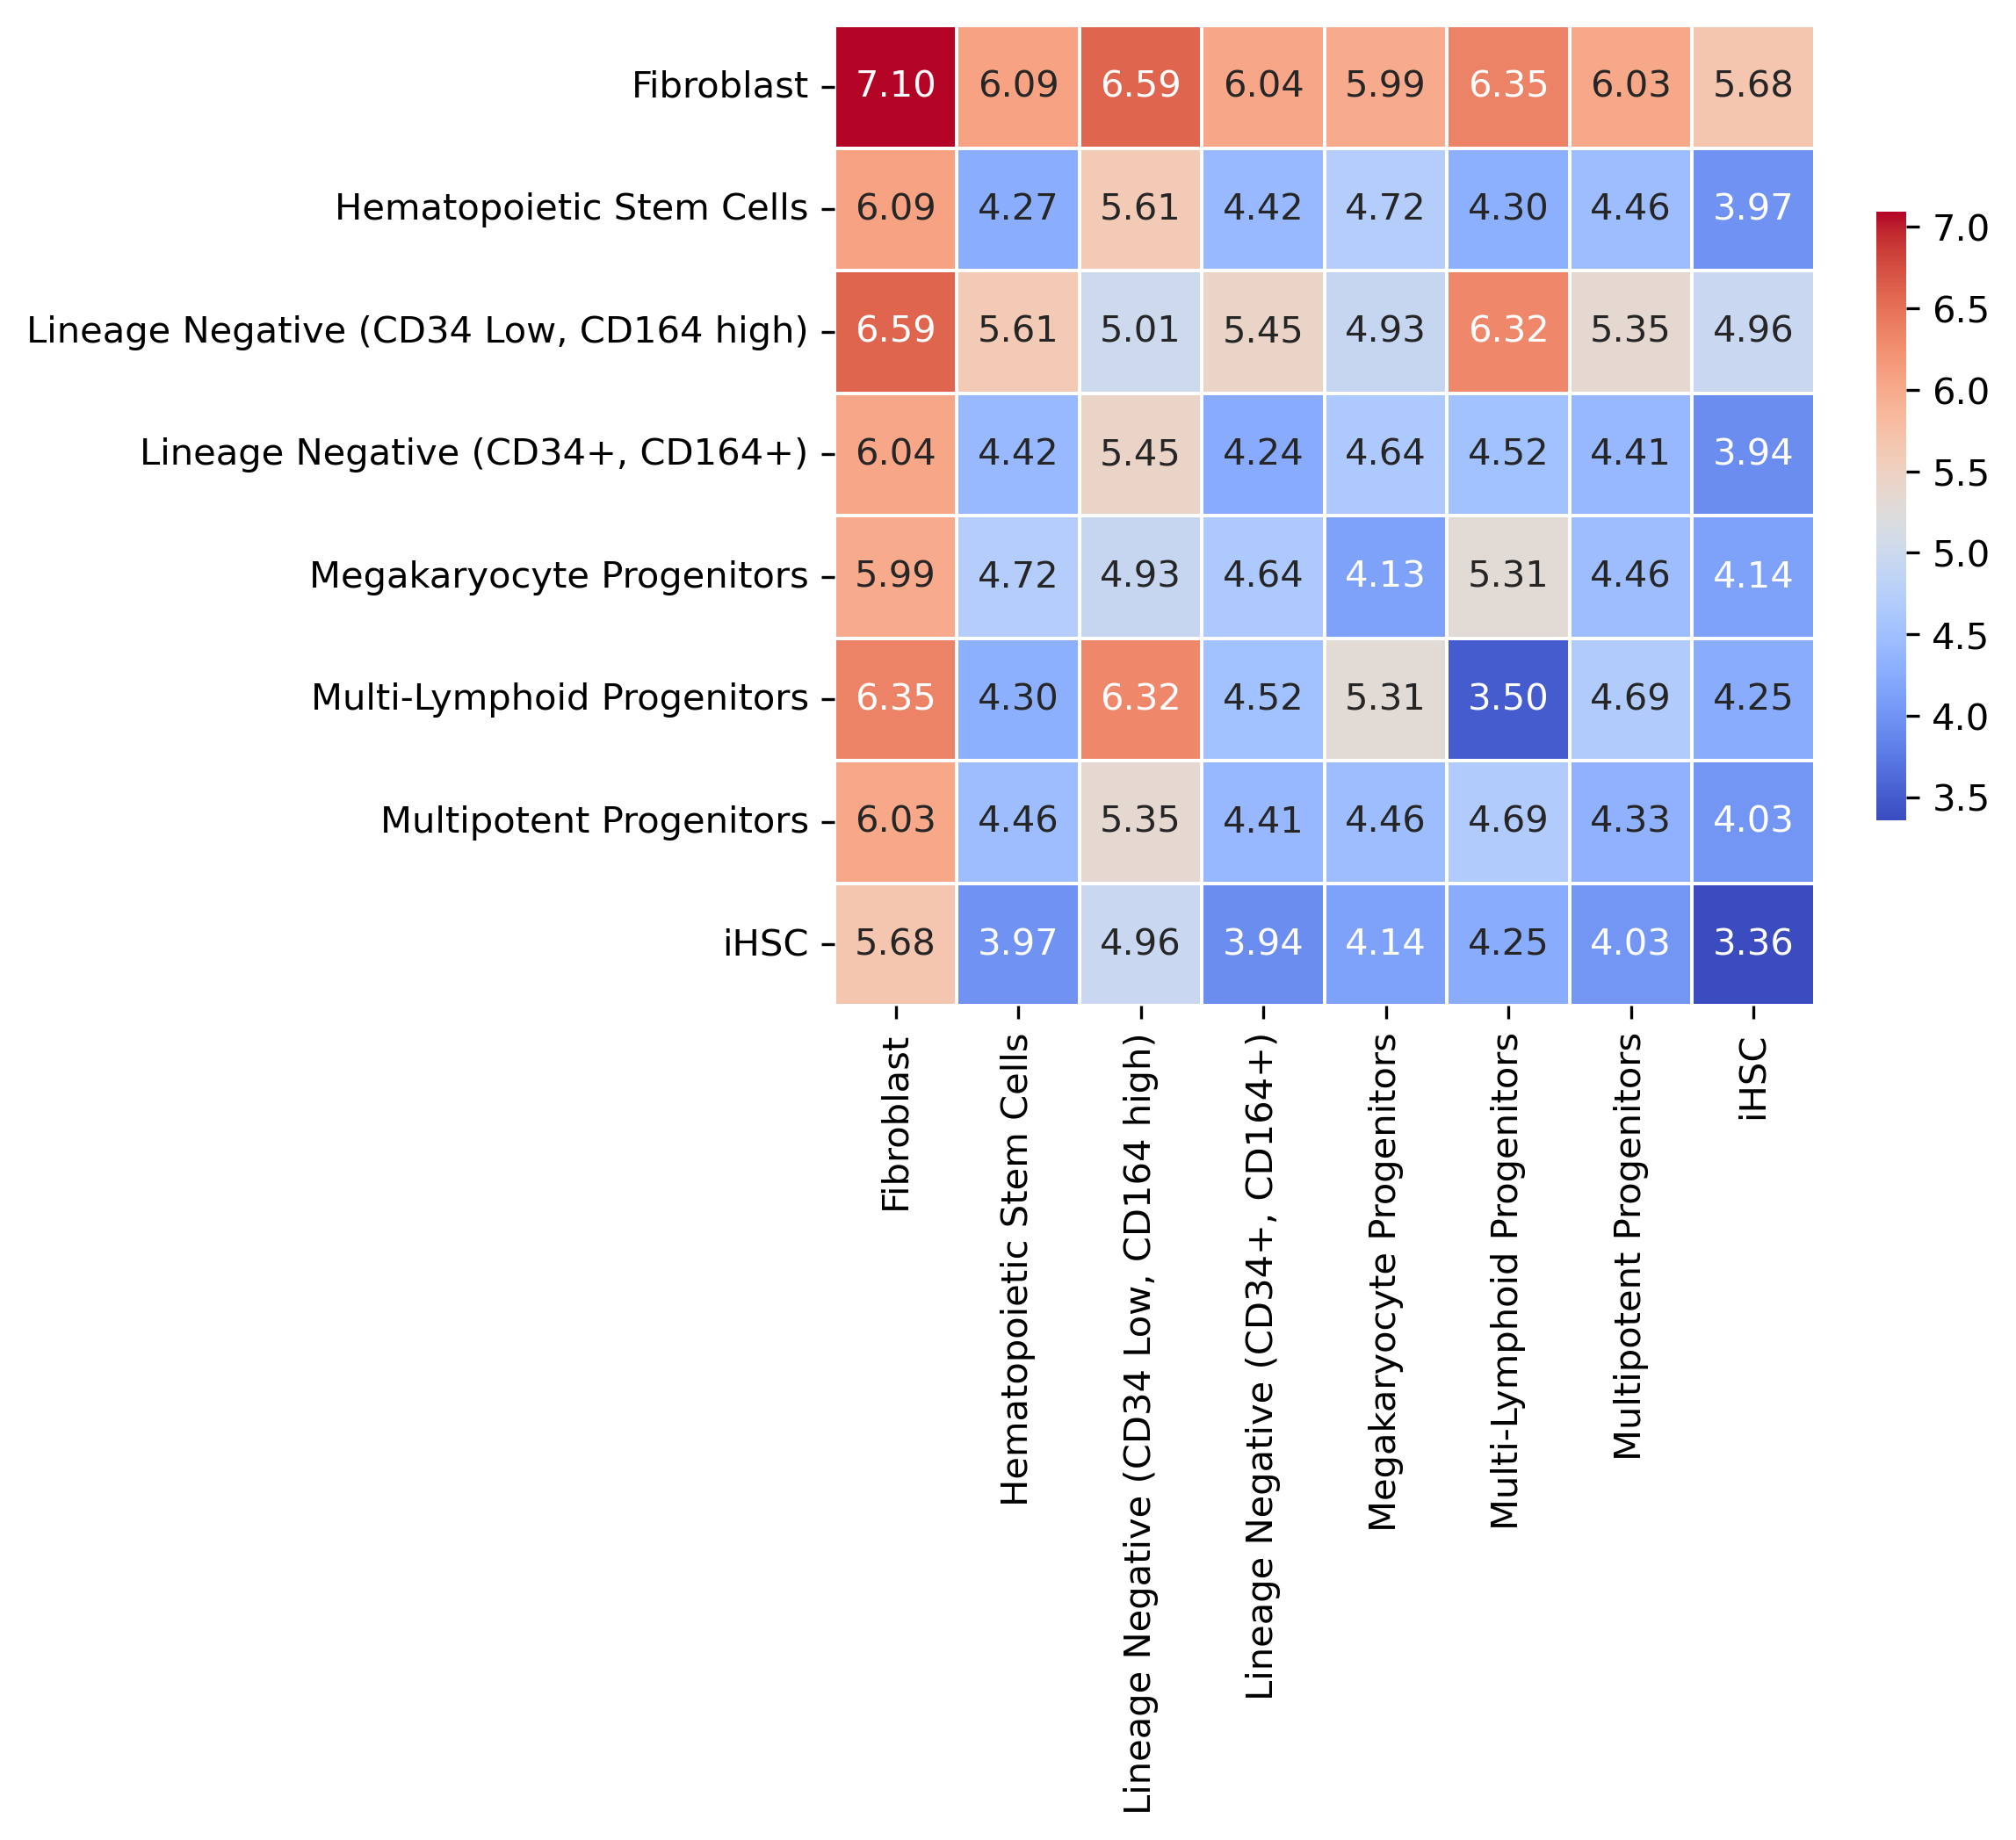

In [21]:
cmap = 'coolwarm'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 6, 6

sns.heatmap(means, 
            square=True,
            linewidth=0.5,
            annot=True,
            cmap=cmap,
            fmt=".2f",
            # vmin=0,
            # vmax=1,
            cbar_kws={'shrink' : 0.5})

plt.ylabel("")
plt.xlabel("")
plt.gca().tick_params(axis='y', rotation=0)

In [14]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
sc.tl.paga(adata, groups="biotype")
sc.pl.paga(adata, color=["biotype"])
sc.tl.umap(adata, init_pos='paga', min_dist=0.1, spread=5.0)

sc.pl.umap(adata, 
           color=['dataset','cell_type'],
           ncols=1,
           s=30,)

In [ ]:
(0.22) --- (-0.23) --- (0.33) --- (-0.12)

In [ ]:
break

# Reprocess

In [ ]:
# # batch correction
# sc.pp.combat(adata, key='dataset')
# adata.X = np.where(adata.X < 0, 0, adata.X)

sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.tl.pca(adata, n_comps=10)
sc.pp.neighbors(adata, n_neighbors=51)
sc.tl.umap(adata, min_dist=0.25)

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sc.pl.umap(adata, 
           color=['dataset','cell_type'],
           ncols=1,
           s=30,)

In [ ]:
# break

In [ ]:
adata.obs['UMAP 1'] = adata.obsm['X_umap'][:, 0]
adata.obs['UMAP 2'] = adata.obsm['X_umap'][:, 1]

cell_map = {
    'iHSC' : 'iHSC',
    'PreBNK' : 'PreBNK',
    'LinNegCD34lowCD164high' : 'LinNeg',
    'HSC' : 'HSC',
    'CMP' : 'CMP',
    'MEP' : 'MEP',
    'LinNegCD34PosCD164Pos' : 'LinNeg',
    'LinNegCD34NegCD164high' : 'LinNeg',
    'MPP' : "MPP",
    'GMP' : "GMP",
    'LinNegCD34NegCD164low' : 'LinNeg',
    'MLP' : "MLP",
    'FB' : "Fibroblast",
    'MKP' : "MKP"
}

adata.obs['broad_type'] = adata.obs['cell_type'].map(cell_map)


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sns.scatterplot(data=adata.obs,
                x='UMAP 1',
                y='UMAP 2',
                ec='none',
                lw=0.1,
                alpha=0.9,
                hue='broad_type',
                palette="nipy_spectral",
                s=5)


plt.xticks([])
plt.yticks([])

sns.move_legend(plt.gca(), 
                title="Cell Type",
                loc='upper right',
                markerscale=3,
                bbox_to_anchor=(1.4, 1.017))

plt.gca().set_aspect('auto')

In [ ]:
sc.tl.paga(adata, groups="broad_type")
sc.pl.paga(adata, color=["broad_type"])
sc.tl.umap(adata, init_pos='paga', min_dist=0.1, spread=5.0)

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sc.pl.umap(adata, 
           color='broad_type',
           ncols=1,
           s=30,)

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5


sc.pl.umap(adata, 
           color='broad_type',
           palette='turbo',
           s=10,
           title="",
           add_outline=True)

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

data_map = {
    'iHSC' : 'iHSC 2024', 
    'pellin' : 'Pellin 2019', 
    'tabula_sapiens' : 'Tabula Sapiens 2023',
    'young2_HSC' : 'Weng 2024',
}

adata.obs['Data Source'] = adata.obs['dataset'].map(data_map)

sns.scatterplot(data=adata.obs,
                x='UMAP 1',
                y='UMAP 2',
                ec='k',
                lw=0.1,
                alpha=0.9,
                hue='Data Source',
                palette="hsv",
                s=3)


plt.xticks([])
plt.yticks([])

sns.move_legend(plt.gca(), 
                title="Data Source",
                loc='upper right',
                markerscale=3,
                bbox_to_anchor=(1.6, 1.017))

plt.gca().set_aspect('auto')

In [ ]:
adata.obs['UMAP 1'] = adata.obsm['X_umap'][:, 0]
adata.obs['UMAP 2'] = adata.obsm['X_umap'][:, 1]

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sns.scatterplot(data=adata.obs,
                x='UMAP 1',
                y='UMAP 2',
                ec='None',
                zorder=0,
                color='lightgrey',
                legend=False,
                s=5)


mask = adata.obs['cell_type'].isin(["HSC", "iHSC", 'FB'])
to_plot = adata.obs[mask].reset_index(drop=False).copy()
to_plot['cell_type'] = to_plot['cell_type'].astype(str)
to_plot['broad_type'] = to_plot['broad_type'].astype(str)

sns.scatterplot(data=to_plot,
                x='UMAP 1',
                y='UMAP 2',
                ec='k',
                zorder=2,
                hue='broad_type',
                palette=['purple', "blue", "red"],
                s=5)

plt.xticks([])
plt.yticks([])

sns.move_legend(plt.gca(), 
                title="Cell Type",
                loc='upper right',
                markerscale=3,
                bbox_to_anchor=(1.6, 1))

plt.gca().set_aspect('auto')

In [ ]:
# break

# Gene Expression

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, 
                       color='CD34',
                       vmin=1, 
                       vmax=5,
                       title='CD34', 
                       s=3,
                      )


In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, 
                       color='GATA2', 
                       title='GATA2',
                       vmin=0, 
                       vmax=4,
                       s=3)

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, 
                       color='GFI1B', 
                       title='GFI1B',
                       vmin=0,
                       vmax=2, 
                       s=3)

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(adata, color='KLF1', title='KLF1', vmin=0, vmax=3, s=3)

In [ ]:
break

# Plot Basins

In [ ]:
iHSC = pdf[pdf.obs['broad_type'] == 'iHSC', :]
HSC = pdf[pdf.obs['broad_type'] == 'HSC', :]
FB = pdf[pdf.obs['broad_type'] == 'Fibroblast', :]

In [ ]:
reload(plt2)
    
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 7
plt2.plot_basin(HSC.obs, cmap='Greens')
plt2.plot_basin(FB.obs, cmap='Blues')
sns.scatterplot(data=iHSC.obs, 
               x='UMAP 1',
               y='UMAP 2',
               c='r',
               ec='none',
               s=3,
               )
plt.xticks([])
plt.yticks([])

# Distance

In [ ]:
metric = 'euclidean'
n_comps = 15
X = pdf.obsm['X_pca'][:, 0:n_comps]

def min_max(v):
    return (v - v.min()) / (v.max() - v.min())

D = scipy.spatial.distance.pdist(X, metric=metric) 
# D = min_max(D)
D = scipy.spatial.distance.squareform(D)
D = pd.DataFrame(D, index=pdf.obs.index, columns=pdf.obs.index)
print(f"{D.shape=}")
D.head()

In [ ]:
def calculate_mean_group_distances(D, pdf, group_col='group'):
    """Calculates mean pairwise distances between groups in a distance matrix.

    Args:
        D (pd.DataFrame): Pairwise distance matrix with index and columns matching pdf.obs.index.
        pdf (anndata.AnnData): Annotated data object containing the grouping column.
        group_col (str, optional): The column name in `pdf.obs` specifying the groups (default is 'group').

    Returns:
        pd.DataFrame: A pivot table with mean pairwise distances between groups.
    """
    results = []
    
    for i_name, group_i in pdf.obs.groupby(group_col):
        for j_name, group_j in pdf.obs.groupby(group_col):
            i_idx = group_i.index
            j_idx = group_j.index
        
            mean_dist = np.mean(D.loc[i_idx][j_idx].to_numpy())
        
            row = {
                'i_name' : i_name,
                'j_name' : j_name,
                'mean_dist' : mean_dist,
            }
        
            results.append(row)
            
    results = pd.DataFrame(results)
    results = pd.pivot_table(results, 
                     index='i_name', 
                     columns='j_name', 
                     values='mean_dist')
    return results


means = calculate_mean_group_distances(D, pdf, group_col='broad_type')
means.head()

In [ ]:
cmap = 'coolwarm'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4

sns.heatmap(means, 
            square=True,
            linewidth=0.5,
            # annot=True,
            cmap=cmap,
            # fmt=".2f",
            # vmin=0,
            # vmax=1,
            cbar_kws={'shrink' : 0.5})

plt.ylabel("")
plt.xlabel("")
plt.gca().tick_params(axis='y', rotation=0)

# distribution of distances for HSC/FIB from iHSC

In [ ]:
ihsc_ind = pdf.obs[pdf.obs['cell_type'] == "iHSC"].index
hsc_ind = pdf.obs[pdf.obs['cell_type'] == "HSC"].index
fb_ind = pdf.obs[pdf.obs['cell_type'] == "FB"].index

print(f"{len(ihsc_ind)=} {len(hsc_ind)=} {len(fb_ind)=}")

t = pd.DataFrame({
    'mean_distance_fb' : D.loc[ihsc_ind][fb_ind].mean(axis=1),   
    'mean_distance_hsc' : D.loc[ihsc_ind][ihsc_ind].mean(axis=1),   
})

print(f"{t.shape=}")
outpath = "/nfs/turbo/umms-indikar/shared/projects/R01/iHSC_euclidean_distance_15pcs.csv"
t = t.reset_index()
t.to_csv(outpath, index=False)
t.head()

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1.25, 2

sns.boxplot(data=pd.melt(t, id_vars='index'), 
            x='variable',
            y='value',
            showfliers=False,
           )

plt.gca().tick_params(axis='x', rotation=90)
ticks = plt.xticks() 
plt.xticks(ticks[0], ['Firboblast', "HSC"])
plt.xlabel("")
plt.ylabel("Euclidean Distance")

In [ ]:
t = pd.DataFrame({
 'distance' : np.diag(means),   
 'cell_type' : means.index,
})

t = t.sort_values(by='distance', ascending=False)


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 2
sns.barplot(data=t, 
            x='cell_type',
            y='distance',
            ec='k'
           )

plt.ylabel('Cell-Cell Distance')
plt.xlabel('')
plt.gca().tick_params(axis='x', rotation=90)

In [ ]:
pdf.obs['Data Source'].unique()

In [ ]:
pdf.obs[pdf.obs['Data Source'] == 'Tabula Sapiens 2023']['cell_type'].unique()

# Gene Scores

In [ ]:
score_name = 'HSC Markers'
genes = [
    'GATA2', 
    'PTPRC',
    "CD34",
    "CD164", 
    'GFI1B', 
]

gene_ids = pdf.var[pdf.var['gene_name'].isin(genes)].index

sc.tl.score_genes(pdf,
                  gene_list=gene_ids, 
                  ctrl_size=len(gene_ids),
                  score_name=score_name)

pdf.obs[score_name] = pdf.obs[score_name]

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

plt2.plot_umap_scatter(pdf, 
                      s=5, 
                      cmap='coolwarm',
                      title='HSC Genes',
                      vmin=-1,
                      vmax=1,
                      color=score_name)

In [ ]:
break

In [ ]:
iHSC = pdf[pdf.obs['broad_type'] == 'iHSC', :]
HSC = pdf[pdf.obs['broad_type'] == 'HSC', :]
FB = pdf[pdf.obs['broad_type'] == 'Fibroblast', :]

print(f"{iHSC.obsm['X_pca'].shape=} {HSC.obsm['X_pca'].shape=} {FB.obsm['X_pca'].shape=}")

In [ ]:
metric = 'euclidean'

D2FB = scipy.spatial.distance.cdist(iHSC.obsm['X_pca'], 
                                    FB.obsm['X_pca'], 
                                    metric=metric
                                   )

D2HSC = scipy.spatial.distance.cdist(iHSC.obsm['X_pca'],
                                     HSC.obsm['X_pca'], 
                                     metric=metric
                                    )

print(f"{D2FB.shape=}")
print(f"{D2HSC.shape=}")

dist = pd.DataFrame({
    'distance_2_fb' :  D2FB.mean(axis=1),
    'distance_2_hsc' : D2HSC.mean(axis=1),
})


dist.index = iHSC.obs.index

dist.head()

In [ ]:
def calculate_relative_position(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Calculates the relative position of values in two vectors on a scale of -1 to 1.

    Args:
        x: A numpy array with values between 0 and -n.
        y: A numpy array with values between 0 and m.

    Returns:
        A numpy array of relative positions between -1 and 1.
    """

    # Ensure vectors are of the same length
    if len(x) != len(y):
        raise ValueError("Input vectors must have the same length.")

    # Normalize x and y to the range [-1, 1]
    x_normalized = x / abs(x.min())  
    y_normalized = y / y.max()

    # Calculate relative positions
    relative_positions = (x_normalized + y_normalized) / 2

    return relative_positions

def continuum(df: pd.DataFrame, dist_col1: str, dist_col2: str, decay_factor: float = 1.0) -> pd.Series:
    """Plots cells along a continuum based on exponential decay of two distance columns.

    Args:
        df: A DataFrame containing the distance columns.
        dist_col1: The name of the first distance column.
        dist_col2: The name of the second distance column.
        decay_factor: The factor controlling the exponential decay rate.

    Returns:
        A Series with the cell_id as index and the continuum position as values.
    """
    # Exponential decay calculation
    x = np.exp(-decay_factor * df[dist_col1])
    y = np.exp(-decay_factor * df[dist_col2])

    # Calculate continuum positions
    continuum_positions = calculate_relative_position(x, y)
    continuum_positions = pd.Series(continuum_positions, index=df.index)
    return continuum_positions.sort_values()
    
    
cont = continuum(dist, 
                 dist_col1='distance_2_fb', 
                 dist_col2='distance_2_hsc')   

cont.max()
# sns.histplot(cont)

In [ ]:
break

In [ ]:
dist.columns

# Plot the basins

In [ ]:
def plot_basin(df, x='UMAP 1', y='UMAP 2', cmap="Reds", bins=100, pthresh=.1, levels=4):
    """
    Plots a basin based on UMAP dimensionality reduction, combining scatter, 2D histogram, and density contours with automatic color selection.

    Args:
        df (pandas.DataFrame): The dataframe containing the UMAP coordinates.
        x (str): The column name for the x-axis ('UMAP 1' by default).
        y (str): The column name for the y-axis ('UMAP 2' by default).
        cmap (str): The colormap for the 2D histogram ("Reds" by default).
        bins (int): The number of bins for the 2D histogram (100 by default).
        pthresh (float): The percentile threshold for the 2D histogram (0.1 by default).
        levels (int): The number of contour levels for the density plot (4 by default).
    """

    # 2D Histogram: Shows density distribution
    sns.histplot(data=df, x=x, y=y, bins=bins, pthresh=pthresh, cmap=cmap)

    # Determine Color for Contours based on colormap
    cmap_obj = plt.cm.get_cmap(cmap)  # Get the colormap object
    contour_color = cmap_obj(0.8)  # Choose a color towards the end of the colormap
    
    # 3. Density Contours: Smoothly outlines areas of high density
    sns.kdeplot(data=df, x=x, y=y, levels=levels, color=contour_color, linewidths=0.5)
    
    
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 7
plot_basin(HSC.obs, cmap='Greens')
plot_basin(FB.obs, cmap='Blues')
sns.scatterplot(data=iHSC.obs, 
               x='UMAP 1',
               y='UMAP 2',
               c='r',
               ec='none',
               s=0.25,
               )
plt.xticks([])
plt.yticks([])

In [ ]:
def plot_density_basin(df, x='UMAP 1', y='UMAP 2', cmap="Reds", bins=500, pthresh=.1, alpha_max=0.8):
    """
    Plots a basin based on UMAP dimensionality reduction, combining scatter, 2D histogram, and fading density representation.

    Args:
        df (pandas.DataFrame): The dataframe containing the UMAP coordinates.
        x (str): The column name for the x-axis ('UMAP 1' by default).
        y (str): The column name for the y-axis ('UMAP 2' by default).
        cmap (str): The colormap for the 2D histogram ("Reds" by default).
        bins (int): The number of bins for the 2D histogram (100 by default).
        pthresh (float): The percentile threshold for the 2D histogram (0.1 by default).
        alpha_max (float): The maximum alpha value for the density plot (0.8 by default).
    """
    #Calculate density
    x_values = df[x]
    y_values = df[y]
    xx, yy = np.mgrid[x_values.min():x_values.max():100j, y_values.min():y_values.max():100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x_values, y_values])
    kernel = scipy.stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    # 2D Histogram: Shows density distribution
    sns.histplot(data=df, x=x, y=y, bins=bins, pthresh=pthresh, cmap=cmap)

    # Fading Density Representation:
    plt.imshow(np.rot90(f), 
               cmap=cmap, 
               alpha=alpha_max, 
               extent=[x_values.min(), x_values.max(), y_values.min(), y_values.max()])
    
    
plot_density_basin(HSC.obs)
plot_density_basin(FB.obs, cmap='Blues')

In [ ]:
break

# Pseudotime

In [ ]:
mask = (pdf.obs['cell_type'] != 'FB')
hdf = pdf[mask, :].copy()

sc.pp.combat(hdf, key='dataset')

# handle negatives
hdf.X = np.where(hdf.X < 0, 0, hdf.X)

# reprocess
sc.pp.highly_variable_genes(hdf, n_top_genes=2000)

sc.tl.pca(hdf)
sc.pp.neighbors(hdf)
sc.tl.umap(hdf) 

hdf

In [ ]:
sc.pl.umap(hdf,
           color=['cell_type', 'dataset'],
           s=50)

In [ ]:
root_type = "HSC"
hdf.uns['iroot'] = np.flatnonzero(hdf.obs['cell_type'] == root_type)[0]

sc.tl.diffmap(hdf, n_comps=21)
sc.pp.neighbors(hdf, n_neighbors=7)
sc.tl.dpt(hdf, n_branchings=0)

hdf

In [ ]:
sc.pl.umap(hdf,
           color='dpt_pseudotime',
           vmin=0, 
           vmax=0.5,
           s=50)

In [ ]:
break

In [ ]:
break